# MTH9875 Homework 5

Assigned: October 1, 2015.
Due: October 15, 2015 by 6pm.

Late homework **will not be accepted**.

## Rongxin Yu

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## An empirical SPX volatility surface

Friday, September 16, 2011 was triple witching day for SPX options and futures.  Thus, the volatility surface as of the close on the 15th, that includes September options expiring the following morning, should have a shape just as interesting as the one shown in Figure 3.2 of The Volatility Surface.  Indeed more interesting, because the term structure of volatility was downwards sloping.

### 1. (3 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
Derive the put-call parity formula for European options in the form

$$
C-P=PV\,(F-K)
$$ 

where $C$ is the call price, $P$ is the put price, $F$ is the forward price, $K$ is the strike and $PV$ is the discount factor.

### Answer:

Consider two porfolios: 

$V_1$: Long a Call and invest cash K*PV at risk free rate. 

$V_2$: Long a Put and hold a share of stock 

Consider the final value of these two portfolios.

If $S \geqslant K$

$V_{1,T} = S - K + K = S, V_{2,T} = S $

If $S < K$

$V_{1,T} = K, V_{2,T} = K - S + S = K$

The final value of two portfolios equal, thus the initial value must also equal. So we have

$$
C + PV * K = P + F * PV
$$

$$
C - P = PV(F-K)
$$


### Download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [12]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BlackScholes.R.zip", destfile="BlackScholes.R.zip")
unzip(zipfile="BlackScholes.R.zip")
source("BlackScholes.R")
#source("Heston2.R")

### 2.  (8 points) 

Given $n$ option strikes from a given expiration $T$, write R-code to take the $2\,n$ option prices and return $F$ and $PV$ for that expiration (obviously you need at least two strikes).  Test your code on the following prices for European options expiring in 36 days:

| Strike | Call price | Put price |
|--------|---------:|----------:|
| 1190 | 52.23 | 37.51 | 
| 1195 | 49.11 | 39.34 | 
| 1200 | 46.59 | 41.52 | 
| 1205 | 43.13 | 42.55 | 
| 1210 | 40.21 | 45.40 | 
| 1215 | 37.45 | 47.57 | 
  



With the resulting values of $F$ and $PV$, and using the implied volatility calculator in *BlackScholes.R*, compute implied volatilities for the above options.  Display these by adding a column to the above table.

In [17]:
### Answer

### P - C = PV * K - PV * F, thus we could regress P - C on K to get PV and F

K <- seq(1190,1215,5)
C <- c(52.23, 49.11, 46.59, 43.13, 40.21, 37.45)
P <- c(37.51, 39.34, 41.52, 42.55, 45.40, 47.57)
reg = lm(P-C~K)
PV <- reg$coefficients[2]
F <- reg$coefficients[1]/(-PV)
T <- 36/252
r <- - 1/T * log(PV)
S0 <- F * PV
impvol = BSImpliedVolCall(S0, K, T, r, C)
data.out <- data.frame(K,C,P,impvol)
colnames(data.out) <- c("Strike", "Call price", "Put price", "Implied Vol")
data.out

,Strike,Call price,Put price,Implied Vol
1,1190,52.23,37.51,0.2480113
2,1195,49.11,39.34,0.2451365
3,1200,46.59,41.52,0.2451427
4,1205,43.13,42.55,0.2394331
5,1210,40.21,45.4,0.2362409
6,1215,37.45,47.57,0.2334305


### Download code for problem 3.

The following code loads the file *spxData110915.rData* into your working directory and sources *plotIvols.R* which has implied volatility smile plotting functionality.

In [19]:
install.packages("stinepack", repos = "http://cran.us.r-project.org")


The downloaded source packages are in
	‘/private/var/folders/sf/kyhj655n5h1_vz2xhpp10tx40000gn/T/Rtmp59f2by/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [20]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")

source("plotIvols.R")

*spxOptionMetrics.rData* contains in particular the data frame `spxData110915` which has all SPX options closing prices as of September 15, 2011.  Data is from OptionMetrics (http://www.optionmetrics.com/index.html) via WRDS (http://wrds-web.wharton.upenn.edu/wrds/).

Note that SPX strike prices are out by a factor of 1000.

In [21]:
load("spxOptionMetrics.rData")

# Inspect the raw data
head(spxData110915[,1:10])

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer
2559920,108105,20110915,SPX 110917C100000,1,20110917,20110815,C,100000,1106.4,1110
2559921,108105,20110915,SPX 110917C1000000,1,20110917,20110915,C,1000000,206.4,210
2559922,108105,20110915,SPX 110917C1005000,1,20110917,20110829,C,1005000,200.2,204.1
2559923,108105,20110915,SPX 110917C1010000,1,20110917,20110829,C,1010000,195.2,199.1
2559924,108105,20110915,SPX 110917C1015000,1,20110917,20110912,C,1015000,190.2,194.1
2559925,108105,20110915,SPX 110917C1020000,1,20110917,20110909,C,1020000,186.5,190.1


,impvolbid,impvolask,Texp,Fwd,K
1,1.727596e-10,1.727596e-10,0.005475702,1217.773,100
2,1.727596e-10,1.727596e-10,0.005475702,1217.773,1000
3,1.727596e-10,1.727596e-10,0.005475702,1217.773,1005
4,1.727596e-10,1.727596e-10,0.005475702,1217.773,1010
5,1.727596e-10,1.727596e-10,0.005475702,1217.773,1015
6,1.727596e-10,1.727596e-10,0.005475702,1217.773,1020
7,1.727596e-10,1.727596e-10,0.005475702,1217.773,1025
8,1.727596e-10,1.727596e-10,0.005475702,1217.773,1030
9,1.727596e-10,1.727596e-10,0.005475702,1217.773,1035
10,1.727596e-10,1.727596e-10,0.005475702,1217.773,1040


### 3.  (20 points) 

(a)
Write a function in R called *generateIvols* that inputs *spxData110915* and outputs bid and offer implied volatilities for all strikes and expirations in a data frame that has the same format as the dataframe `spxOptData` from Lecture 5.


(b)
Plot your results using *plotIvols()*; your picture should look something like Figure 6 in the lecture slides (without the orange SVI fit of course).


In [119]:
### Answer 

### (a)

impvol <- function(rawData, date){
    data = rawData[rawData$exdate==date,]
    T = as.numeric((as.Date(date, format="%Y%m%d") - as.Date("20110915", format="%Y%m%d")) / 365.25)
    K <- unique(data$strike_price)/1000

    Cbid <- data[data$cp_flag=="C",]$best_bid
    Pbid <- data[data$cp_flag=="P",]$best_bid
    

    Cask <- data[data$cp_flag=="C",]$best_offer
    Pask <- data[data$cp_flag=="P",]$best_offer
    
    C = (Cbid + Cask)/2
    P = (Pbid + Pask)/2
    
    reg = lm(P-C~K)
    PV <- reg$coefficients[2]
    F <- reg$coefficients[1]/(-PV)

    r <- - 1/T * log(PV)
    S0 <- F * PV
    Fwd = rep(F, length(K))
    
    impvolbid = BSImpliedVolCall(S0, K, T, r, Cbid)
    impvolask = BSImpliedVolCall(S0, K, T, r, Cask)

    Texp = rep(T, length(K))
    
    data.out <- data.frame(impvolbid,impvolask, Fwd, Texp, K)
    return(data.out)
}
output = data.frame()
dates = as.character(unique(spxData110915$exdate))
for(i in 1:length(dates)){

    output = rbind(output, impvol(spxData110915, dates[i]))
}



ERROR: Error in par(new = T): graphical parameter "new" has the wrong length


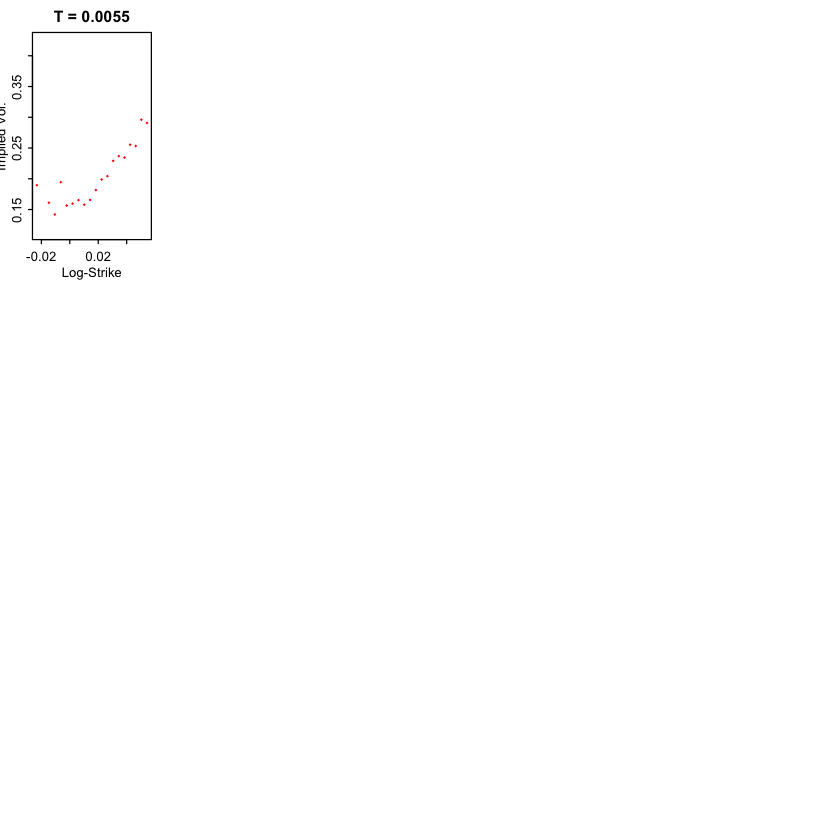

In [124]:
### (b)
colnames(output) = c("Bid", "Ask",  "Fwd", "Texp", "Strike")
temp = output$Bid[1]
output$Bid[output$Bid==temp]=NA
output$Ask[output$Ask==temp]=NA
plotIvols(output)  ### no idea what's wrong with the function plotIvols


## Rough calibration of the Heston parameters

### 4.  (20 points) 

(a)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (23) for ATM variance skew to the empirical ATM skew estimates in Table 2. 


(b)
Using your code from (a) and all the points, assuming $\rho=-0.7$, estimate the Heston parameters $\lambda$ and $\eta$. How similar are your estimates the Heston parameters $\lambda$ and $\eta$ to the estimates from September 2005 listed in Table 3 of Lecture 5?  Are Heston fitted parameters stable over time?


(c)
Repeat (a) and (b) dropping the first three rows of Table 2, as in Lecture 5.


(d) Fit a power law of the form $A/T^\alpha$ to the ATM variance skew data (all points).


(e) 
Superimpose graphs of your resulting ATM skew fits from (b), (c), and (d) to generate a plot like Figure 8 of Lecture 5.


(f)
Amend the plotIvols() code (renaming it plotIvolsHeston(..)) to take data and Heston parameters as input and superimpose Heston smiles on the empirical smiles.  Using your fitted parameters from (f) to get a picture like Figure 6 (except that Heston doesn't fit!). (You may have to vectorize the *impvolHeston* function to get this to work in the iPython notebook.)

(g) 
Note that the Heston smiles are consistently below the empirical smiles.  Why is that? How do Heston skews compare with empirical skews?

In [125]:
### Answer

### (a)


[1] -1.388691  7.996911


In [126]:
# (b)
rho <- -0.7
eta <- fit1[1]/rho
lam <- fit1[2]
cat("eta is:", eta, "\n")
cat("lambda is:", lam, "\n")
cat("The eta and lambda is very different from table 3 (nearly 7 times of those in table 3). So Heston fitted parameters are not stable over time. \n")

eta is: 1.983844 
lambda is: 7.996911 
The eta and lambda is very different from table 3 (nearly 7 times of those in table 3). So Heston fitted parameters are not stable over time. 


In [127]:
# (c)
skewObjective2 <- function(skewParams){
    
    skewModel <- skewHeston(skewParams,texp[-(1:3)])
    skewEmpirical <- atmSkews[-(1:3)]
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

res2 <- optim(c(-.7*.39,1.15),skewObjective2)
fit2 <- res2$par

rho <- -0.7
eta <- fit2[1]/rho
lam <- fit2[2]
cat("eta is:", eta, "\n")
cat("lambda is:", lam, "\n")
cat("The eta and lambda is very different from table 3 (nearly 3 times of those in table 3). So Heston fitted parameters are not stable over time. \n")

eta is: 1.364621 
lambda is: 3.772332 
The eta and lambda is very different from table 3 (nearly 3 times of those in table 3). So Heston fitted parameters are not stable over time. 


In [128]:
# (d)
skewObjectivePL <- function(alpha){
    
    skewModel <- atmSkews[5]*(texp[5]/texp)^alpha
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

resPL <- optim(.4,skewObjectivePL)
fitPL <- resPL$par
cat("alpha is", fitPL, "\n")

Warning message:
In optim(0.4, skewObjectivePL): one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly

alpha is 0.2171875 


Comments: If I use all the data, the curve doesn't fit. If I don't use the first data point, the curve will fit.

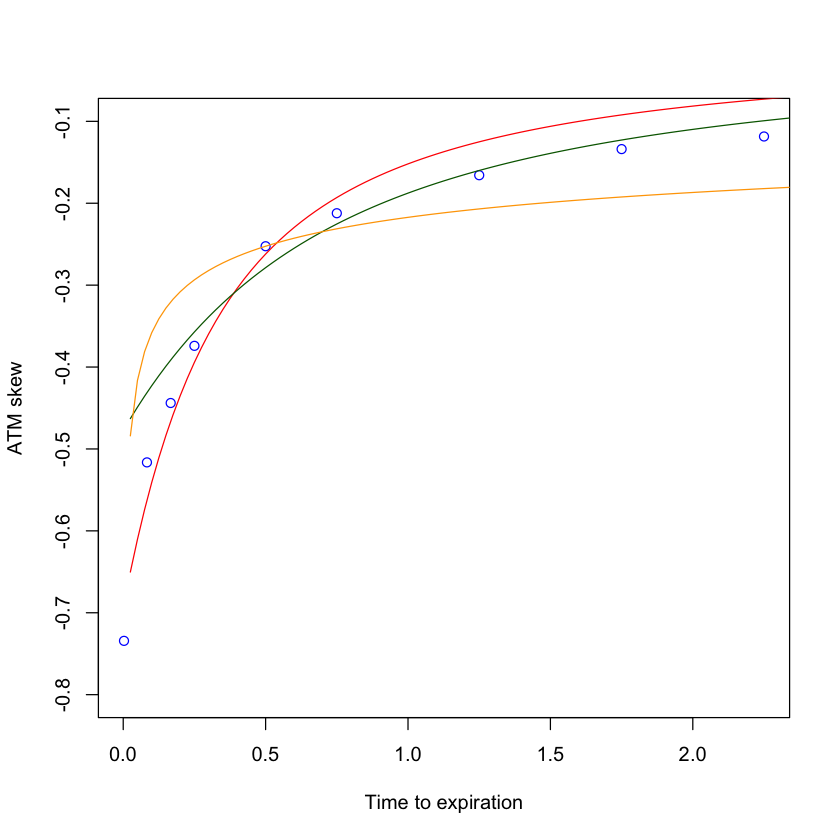

In [129]:
# (e)
plot(texp,atmSkews,col="blue",ylim=c(-.8,-.1),xlab="Time to expiration",ylab="ATM skew")
curve(skewHeston(fit1,x),from=0,to=2.5,col="red",add=TRUE)
curve(skewHeston(fit2,x),from=0,to=2.5,col="dark green",add=TRUE)
curve(atmSkews[5]*(texp[5]/x)^fitPL,from=0,to=2.5,col="orange",add=TRUE)
cat("Comments: If I use all the data, the curve doesn't fit. If I don't use the first data point, the curve will fit.")